In [1]:
import os
from aitk.utils import gallery, array_to_image
from aitk.networks import Network
import cv2
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Rescaling
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2022-12-28 00:36:03.275354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load the data using OpenCV

Part of the code used to read the files was from Swamita Gupta, another Kaggle user!



In [2]:

def laod_data():
    data_dir = "ASL_Data/asl_alphabet_train/asl_alphabet_train/"

    images = []
    labels = []

    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    np_array = np.array(images)
    images = np_array.astype('float32')
    train_x, test_x, train_y, test_y = train_test_split(images, labels, test_size = 0.2)
    return [train_x, test_x, train_y, test_y]

In [4]:
data = laod_data()

Obtaining images of R ...
Obtaining images of U ...
Obtaining images of I ...
Obtaining images of N ...
Obtaining images of G ...
Obtaining images of Z ...
Obtaining images of T ...
Obtaining images of S ...
Obtaining images of A ...
Obtaining images of F ...
Obtaining images of O ...
Obtaining images of H ...
Obtaining images of del ...
Obtaining images of nothing ...
Obtaining images of space ...
Obtaining images of M ...
Obtaining images of J ...
Obtaining images of C ...
Obtaining images of D ...
Obtaining images of V ...
Obtaining images of Q ...
Obtaining images of X ...
Obtaining images of E ...
Obtaining images of B ...
Obtaining images of K ...
Obtaining images of L ...
Obtaining images of Y ...
Obtaining images of P ...
Obtaining images of W ...


In [5]:
train_x = data[0]
test_x = data[1]
train_y = data[2]
test_y = data[3]

In [6]:
print(train_x.shape)
print(len(train_y))
print(test_x.shape)
print(len(test_x))

(69600, 32, 32, 3)
69600
(17400, 32, 32, 3)
17400


In [7]:
images = [array_to_image(train_x[i]) for i in range(15)]
bigger = [image.resize((100, 100)) for image in images]

21,18,12,7,2
16,4,27,11,22
19,23,10,21,25

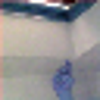
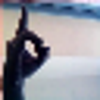
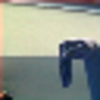
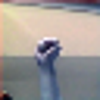
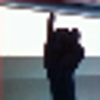
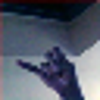
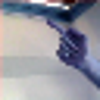
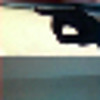
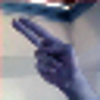
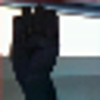
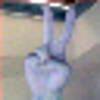
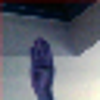
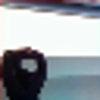
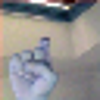
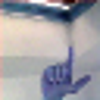

In [8]:
gallery(bigger, gallery_shape= (5, 3), labels=train_y[:15])

In [9]:
train_y[:15]

[21, 18, 12, 7, 2, 16, 4, 27, 11, 22, 19, 23, 10, 21, 25]

### Prepare the Data:
 - includes normalizing the data, 
 - making the labels into one hot vectors
 

In [10]:
min_input, max_input = train_x.min(), train_x.max()
print(f"min input: {min_input}, max input: {max_input}")

min input: 0.0, max input: 255.0


In [11]:
train_x_normalized = train_x/255.0
test_x_normalized = test_x/255.0

In [12]:
train_y_categories = to_categorical(train_y, 29)
test_y_categories = to_categorical(test_y, 29)

In [13]:
train_y_categories[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)


### Building The Model

In [14]:
model = Sequential()
model.add(Conv2D(32, (4, 4), name="conv1", activation="relu", padding="same", input_shape=(32, 32, 3) ))
model.add(Conv2D(27, (3, 3), name="conv2", activation="relu", padding="same",))
model.add(MaxPooling2D(pool_size= (2,2), name= "pool1"))
model.add(Flatten(name="flatten"))
model.add(Dense(100, name="hidden1", activation="relu"))
model.add(Dense(29, name="output", activation="softmax"))
model.summary()



2022-12-28 00:39:31.553739: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        1568      
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 27)        7803      
                                                                 
 pool1 (MaxPooling2D)        (None, 16, 16, 27)        0         
                                                                 
 flatten (Flatten)           (None, 6912)              0         
                                                                 
 hidden1 (Dense)             (None, 100)               691300    
                                                                 
 output (Dense)              (None, 29)                2929      
                                                                 
Total params: 703,600
Trainable params: 703,600
Non-trai

In [15]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

### AITK for visualization



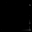
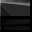
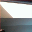

In [19]:
from time import sleep
net = Network(model)
for i in range(29):
    net.propagate(train_x_normalized[i])
    net.display(train_x_normalized[i])
    sleep(1.0)

### Training the model

In [17]:
history = net.fit(train_x_normalized, train_y_categories, 
                  verbose = 1, 
                  validation_data = (test_x_normalized, test_y_categories), epochs = 4)

Epoch 4/4 loss: 0.056311722844839096 - accuracy: 0.9815086126327515 - val_loss: 0.043841708451509476 - val_accuracy: 0.9837930798530579


In [18]:
test_loss, test_acc = model.evaluate(test_x_normalized, test_y_categories)
print(f"test_loss:{test_loss:.2f}, test_acc: {test_acc:.2f}") 


544/544 [==============================] - 4s 7ms/step - loss: 0.0438 - accuracy: 0.9838
test_loss:0.04, test_acc: 0.98
